In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 20) #Changes the default size of plotted figures.

We started with a simple 2 body orbit. Now we try to work in another body into the mix.


In [39]:
#G = 6.674 * 10 ** (-11) * (3600 * 24) ** 2 #m^3 kg^-1 day^-2
G = 6.674 * 10 ** (-11) * (3600 ** 2) #m^3 kg^-1 hr^-2
#G = 6.674 * 10 ** (-11) ##m^3 kg^-1 s^-2

#Standard Distance Equation
def calc_distance(x_position_1 = 0, y_position_1 = 0, x_position_2 = 0, y_position_2 = 0): 
    R = np.sqrt((x_position_1 - x_position_2)**2 + (y_position_1 - y_position_2)**2)
    return R
#Newtonian equations of motion for velocity and position.
def update_velocity(velocity, acceleration, timestep):
    new_velocity = velocity + (acceleration * timestep)
    return new_velocity
def update_position(x, y, v_x, v_y, timestep):
    new_x = x + v_x*timestep
    new_y = y + v_y*timestep
    return new_x, new_y
def calculate_accelerations(bodies):
    x_accelerations = []
    y_accelerations = []
    for orbitting_body in bodies:
        x_accel = 0
        y_accel = 0
        for central_body in bodies:
            if central_body != orbitting_body:
                R = calc_distance(central_body.x_position, central_body.y_position, orbitting_body.x_position, orbitting_body.y_position)
                x_accel += -G * central_body.mass * np.abs(R ** (-3)) * (-central_body.x_position + orbitting_body.x_position)
                y_accel += -G * central_body.mass * np.abs(R ** (-3)) * (-central_body.y_position + orbitting_body.y_position)
        x_accelerations.append(x_accel)
        y_accelerations.append(y_accel)
    return x_accelerations, y_accelerations

#The heart of the simulation.

def calculate_step(bodies, t = 1):
    x_accelerations, y_accelerations = calculate_accelerations(bodies)
    for i in range(0, len(bodies)):
        bodies[i].x_position, bodies[i].y_position = update_position(bodies[i].x_position, bodies[i].y_position, bodies[i].x_velocity, bodies[i].y_velocity, t)        
        bodies[i].x_velocity = update_velocity(bodies[i].x_velocity, x_accelerations[i], t)
        bodies[i].y_velocity = update_velocity(bodies[i].y_velocity, y_accelerations[i], t)
    return
        
class body:
    global G
    def __init__(self, name, mass, x_position, y_position, x_velocity, y_velocity):
        self.name = name
        self.mass = mass
        self.x_position = x_position
        self.y_position = y_position
        self.x_velocity = x_velocity
        self.y_velocity = y_velocity
        


In [41]:
#Initial Conditions Values taken from NASA's fact sheets on solar system bodies
#https://nssdc.gsfc.nasa.gov/planetary/planetfact.html

M1 = 1.9091 * 10 ** 30 #kg #solar mass
M2 = 5.9724 * 10 ** 24 #kg #earth mass
M3 = 6.4171 * 10 ** 23 #kg #mars mass
M4 = 3.3011 * 10 ** 23 #kg #mercury mass
M5 = 4.8675 * 10 ** 24 #kg #venus mass

v_earth = (30.29 * 10 ** 3) * 3600# m/hr
x_earth = 147.09 * 10 ** 9 #m at perihelion
y_earth = 0 #m

v_mars = (26.5 * 10 ** 3) * 3600 #m/hr
x_mars = 206.62 * 10 ** 9 #m at perihelion
y_mars = 0 #m

v_mercury = (58.98 * 10 ** 3) * 3600 #m/hr
x_mercury = 46.0 * 10 ** 9 #m at perihelion
y_mercury = 0 #m

v_venus = (35.26 * 10 ** 3) * 3600 #m/hr
x_venus = 107.48 * 10 ** 9 #m at perihelion
y_venus = 0 #m

Sun = body("Sun", M1, 0, 0, 0, 0)
Earth = body("Earth", M2, x_earth, y_earth, 0, v_earth)
Mars = body("Mars", M3, x_mars, y_mars, 0, v_mars)
Mercury = body("Mercury", M4, x_mercury, y_mercury, 0, v_mercury)
Venus = body("Venus", M5, x_venus, y_venus, 0, v_venus)


In [4]:
#Creating arrays to store the data points to be plotted
earth_y_pos = []
earth_x_pos = []
sun_y_pos = []
sun_x_pos = []
mars_y_pos = []
mars_x_pos = []
mercury_x_pos = []
mercury_y_pos = []
venus_x_pos = []
venus_y_pos = []

#Run Simulation
for t in range(24000):
    earth_x_pos.append(Earth.x_position)
    earth_y_pos.append(Earth.y_position)
    mars_x_pos.append(Mars.x_position)
    mars_y_pos.append(Mars.y_position)
    sun_x_pos.append(Sun.x_position)
    sun_y_pos.append(Sun.y_position)
    mercury_x_pos.append(Mercury.x_position)
    mercury_y_pos.append(Mercury.y_position)
    venus_x_pos.append(Venus.x_position)
    venus_y_pos.append(Venus.y_position)
    calculate_step([Sun, Earth, Mars, Mercury, Venus])
    


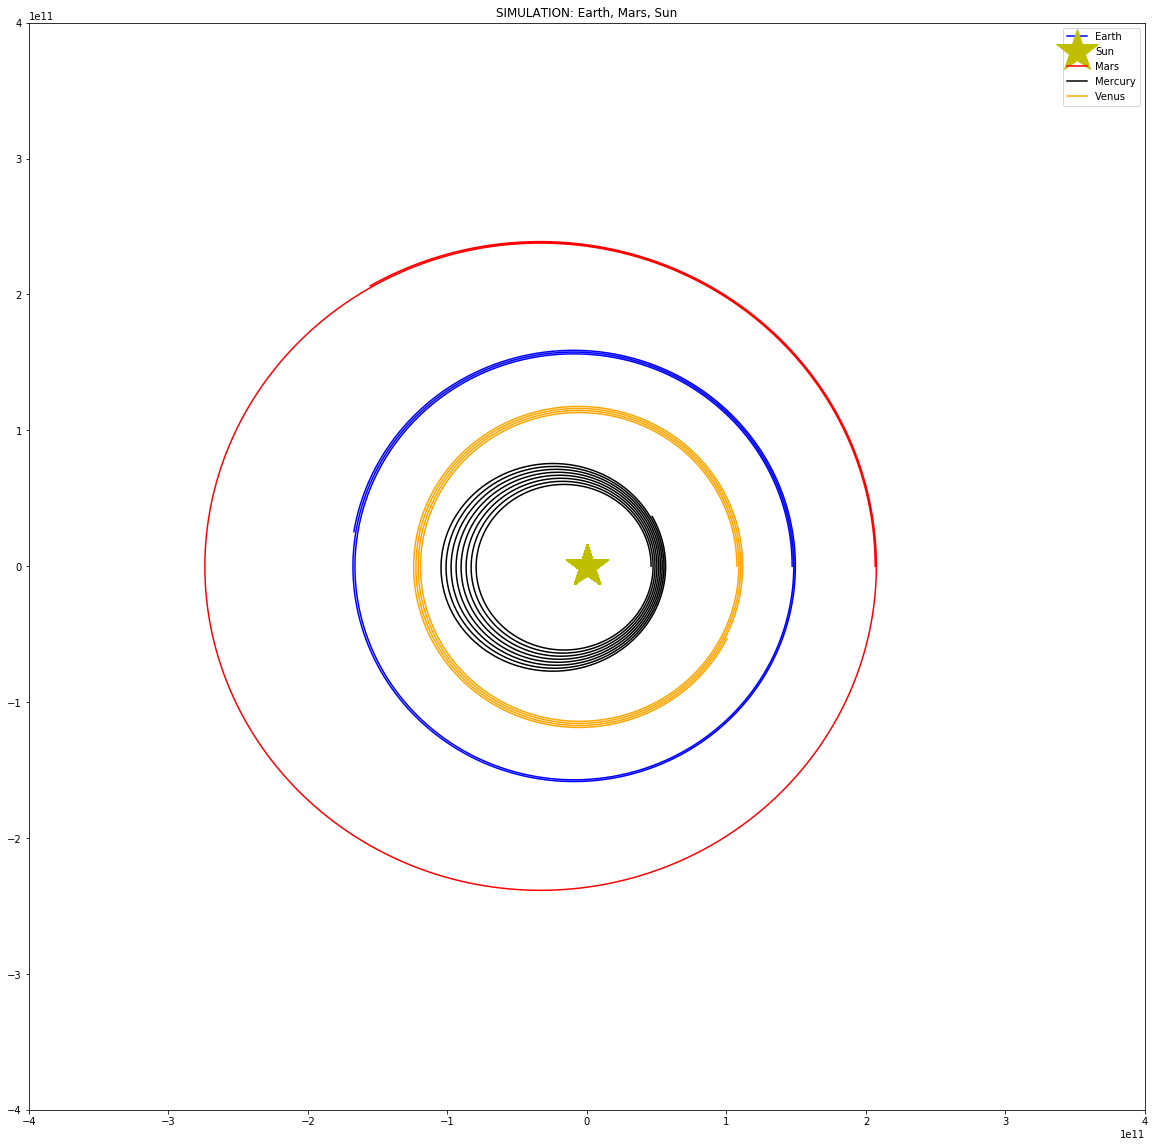

In [44]:
plt.plot(earth_x_pos, earth_y_pos, 'b-', label = "Earth")
plt.plot(sun_x_pos, sun_y_pos, 'y*', markersize = 45, label = "Sun")
plt.plot(mars_x_pos, mars_y_pos, 'r-', label = "Mars")
plt.plot(mercury_x_pos, mercury_y_pos, 'k-', label = "Mercury")
plt.plot(venus_x_pos, venus_y_pos, color = 'orange', label = "Venus")


#Lock the Axes so it does not change with the values plotted
plt.xlim(-4 * 10 ** 11, 4 * 10**11)
plt.ylim(-4 * 10 ** 11, 4 * 10**11)
plt.legend()

plt.title("SIMULATION: Earth, Mars, Sun")

plt.show()

In [ ]:
#Simulation Wrapper
def simulate(bodies, simulation_time, lim_low = -4 * 10 ** 11, lim_high = 4 * 10 ** 11):
    file = open("simulation.py", "w")
    for body in bodies:
        file.write(body.name + "_x_position = [] \n")
        file.write(body.name + "_y_position = [] \n")
    file.write("for t in range(0, simulation_time): \n")
    for body in bodies:
        file.write("  " + body.name + "_x_position.append(" + body.name + ".x_position) \n")
        file.write("  " + body.name + "_y_position.append(" + body.name + ".y_position) \n")
    file.write("  calculate_step([")
    for body in bodies:
        file.write(body.name + ", ")
    file.write("]) \n")
    for body in bodies:
        file.write("plt.plot(" + body.name + "_x_position, " + body.name + "_y_position, label = \"" + str(body.name) + "\") \n")
    file.write("plt.legend() \n")
    #Mandate a square field of view
    file.write("plt.xlim(" + str(lim_low) + ", " + str(lim_high) + ") \n")
    file.write("plt.ylim(" + str(lim_low) + ", " + str(lim_high) + ") \n")
    file.write("plt.show() \n")
    file.close()
    exec(open("simulation.py").read()) #Information for running programs within Python programs can be found here: https://stackoverflow.com/questions/7974849/how-can-i-make-one-python-file-run-another
    return
    

#Initial Conditions Values taken from NASA's fact sheets on solar system bodies
#https://nssdc.gsfc.nasa.gov/planetary/planetfact.html

M1 = 1.9091 * 10 ** 30 #kg #solar mass
M2 = 5.9724 * 10 ** 24 #kg #earth mass
M3 = 6.4171 * 10 ** 23 #kg #mars mass
M4 = 3.3011 * 10 ** 23 #kg #mercury mass
M5 = 4.8675 * 10 ** 24 #kg #venus mass

v_earth = (30.29 * 10 ** 3) * 3600# m/hr
x_earth = 147.09 * 10 ** 9 #m at perihelion
y_earth = 0 #m

v_mars = (26.5 * 10 ** 3) * 3600 #m/hr
x_mars = 206.62 * 10 ** 9 #m at perihelion
y_mars = 0 #m

v_mercury = (58.98 * 10 ** 3) * 3600 #m/hr
x_mercury = 46.0 * 10 ** 9 #m at perihelion
y_mercury = 0 #m

v_venus = (35.26 * 10 ** 3) * 3600 #m/hr
x_venus = 107.48 * 10 ** 9 #m at perihelion
y_venus = 0 #m

Sun = body("Sun", M1, 0, 0, 0, 0)
Earth = body("Earth", M2, x_earth, y_earth, 0, v_earth)
Mars = body("Mars", M3, x_mars, y_mars, 0, v_mars)
Mercury = body("Mercury", M4, x_mercury, y_mercury, 0, v_mercury)
Venus = body("Venus", M5, x_venus, y_venus, 0, v_venus)

bodies = [Sun, Earth, Mars, Mercury, Venus]
simulate(bodies, 24000)